In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# gen_key.py  
# from cryptography.fernet import Fernet

# key = Fernet.generate_key()
# with open("secret.key", "wb") as f:
#     f.write(key)
# print("Wrote secret.key (KEEP THIS SAFE).")


In [ ]:
import sqlite3
import pandas as pd
from cryptography.fernet import Fernet

DB_FILE = "telematics.db"
KEY_FILE = "secret.key"

conn = sqlite3.connect(DB_FILE)

drivers = pd.read_sql("SELECT * FROM drivers", conn)

features = pd.read_sql("SELECT * FROM trips", conn)

telemetry = pd.read_sql("SELECT * FROM telemetry_secure", conn)

conn.close()

print("✅ Loaded from DB")
print("Drivers:", drivers.shape)
print("Trips:", features.shape)
print("Telemetry:", telemetry.shape)

def load_key(key_file=KEY_FILE):
    with open(key_file, "rb") as f:
        return f.read()

def decrypt_value(value, fernet):
    if value is None:
        return None
    return float(fernet.decrypt(value.encode()).decode())

key = load_key()
fernet = Fernet(key)

telemetry["lat_dec"] = telemetry["lat"].apply(lambda x: decrypt_value(x, fernet))
telemetry["lon_dec"] = telemetry["lon"].apply(lambda x: decrypt_value(x, fernet))

display(telemetry)


✅ Loaded from DB
Drivers: (30, 23)
Trips: (300, 12)
Telemetry: (209104, 11)


,id,timestamp,trip_id,driver_id,lat,lon,speed,acceleration,road_type,engine_on,geohash,lat_dec,lon_dec
0,1,2025-09-07 01:17:00,driver_1_trip_1,driver_1,gAAAAABowmWylTbbXDlUHl-zlmxBNt-jwaK-tanrmV6slS...,gAAAAABowmW1Yr8susleq1X8ZsWJiK1U_Q-2e_VshY3dv9...,9.905877,-2.343964,residential,1,9muz8,33.678795,-117.062931
1,2,2025-09-07 01:17:05,driver_1_trip_1,driver_1,gAAAAABowmWyT5Ax185kRaethjl1hllfBMcHPoRj3vBWve...,gAAAAABowmW12Wy3gScW8eSQq5_8b1NZIsJLGy-JQygtku...,11.761901,0.371205,residential,1,9ub15,26.901010,-101.083936
2,3,2025-09-07 01:17:10,driver_1_trip_1,driver_1,gAAAAABowmWy-3FjlbDklgqPgBw9ukct7WmBWsLJZhKxa0...,gAAAAABowmW1YbH3HF1EaHZOmg8i414WiefDODSCmPCIaV...,12.201238,0.087868,residential,1,dq7rh,36.428386,-74.003414
3,4,2025-09-07 01:17:15,driver_1_trip_1,driver_1,gAAAAABowmWyl2Cg91Sa2nFSaUn5nDSZ9cHZ5KXKwRzlsV...,gAAAAABowmW1bWa1sIFAuWVfjpOkx_uXdZxxdZOsnS8Vyg...,20.073079,1.574368,residential,1,9mu5p,32.871377,-117.781032
4,5,2025-09-07 01:17:20,driver_1_trip_1,driver_1,gAAAAABowmWyrsNscrmYnHEENxY4VJ9ZbbL9tujzXW0ep8...,gAAAAABowmW18Ob4NkSDACi9udXQrZVTsoMyAj5Y0frJLh...,8.429803,-2.328655,residential,1,dr7v2,41.743242,-73.433907
...,...,...,...,...,...,...,...,...,...,...,...,...,...
209099,209100,2025-09-05 05:19:05,driver_30_trip_10,driver_30,gAAAAABowmYJXRybYpeS4ggCAw46VZmsCcANcJJ6C5TBBd...,gAAAAABowmYLtqlnXoaSp4g7Wxs4yVPtdfJ8mJHoVEYdsI...,49.637773,-3.356191,highway,1,c2e34,48.015401,-119.085536
209100,209101,2025-09-05 05:19:10,driver_30_trip_10,driver_30,gAAAAABowmYJbdE1Nf0VaI2ibziWNzZqgFJTPR0j5V-mMI...,gAAAAABowmYLp5Q5fpoo7Y0PmLL3ZqEojkutdC5NojKqDa...,60.835609,2.239567,highway,1,f2wcr,48.057874,-68.942512
209101,209102,2025-09-05 05:19:15,driver_30_trip_10,driver_30,gAAAAABowmYJxuUeVBiH9u9GWLrlwgPVLNouuWq7NuHorc...,gAAAAABowmYLSmJiWyzwd4xzW4OxnuyX71UVk3ijOm4d4r...,53.181163,-1.530889,highway,1,dnky8,36.303880,-83.298447
209102,209103,2025-09-05 05:19:20,driver_30_trip_10,driver_30,gAAAAABowmYJ2G9TQc4XyPQjh5NESRTjMlTCo8srUI93PX...,gAAAAABowmYL2Y7YZT22RM0W5Qe-gdk4OTFGAr2wzZDlob...,53.840610,0.131889,highway,1,f0jm1,45.888556,-82.568962


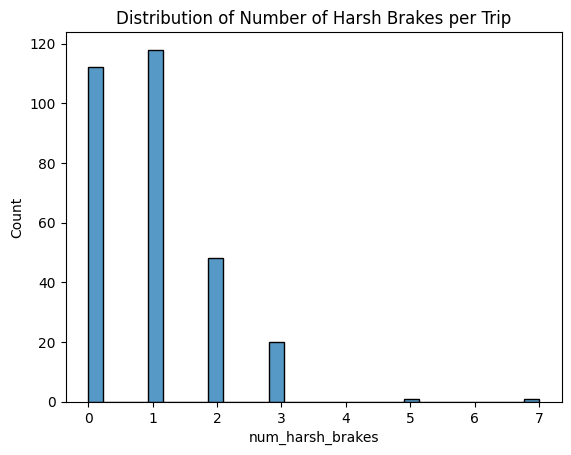

In [ ]:
sns.histplot(features['num_harsh_brakes'], bins=30, kde=False)
plt.title("Distribution of Number of Harsh Brakes per Trip")
plt.show()

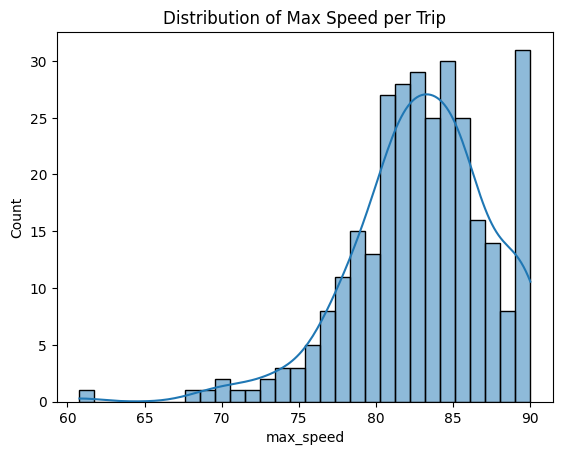

In [ ]:
sns.histplot(features['max_speed'], bins=30, kde=True)
plt.title("Distribution of Max Speed per Trip")
plt.show()

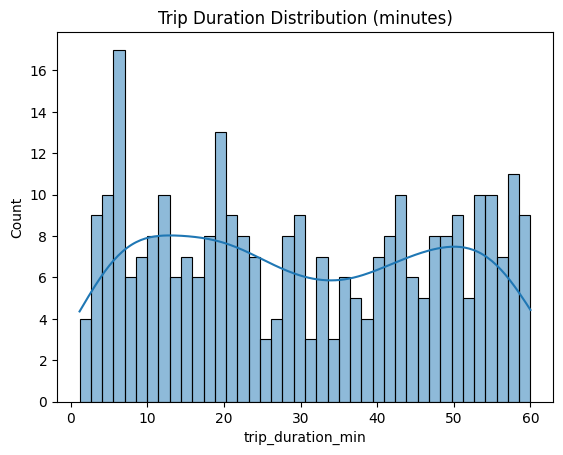

In [ ]:
sns.histplot(features['trip_duration_min'], bins=40, kde=True)
plt.title("Trip Duration Distribution (minutes)")
plt.show()

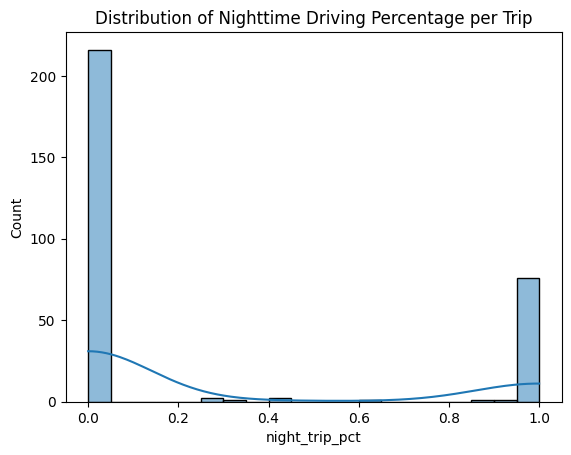

In [ ]:
sns.histplot(features['night_trip_pct'], bins=20, kde=True)
plt.title("Distribution of Nighttime Driving Percentage per Trip")
plt.show()

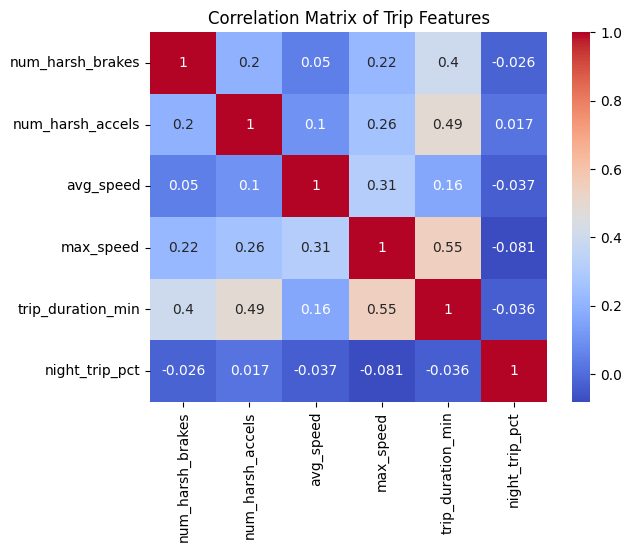

In [ ]:
corr = features[['num_harsh_brakes', 'num_harsh_accels', 'avg_speed', 'max_speed', 'trip_duration_min', 'night_trip_pct']].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Trip Features")
plt.show()

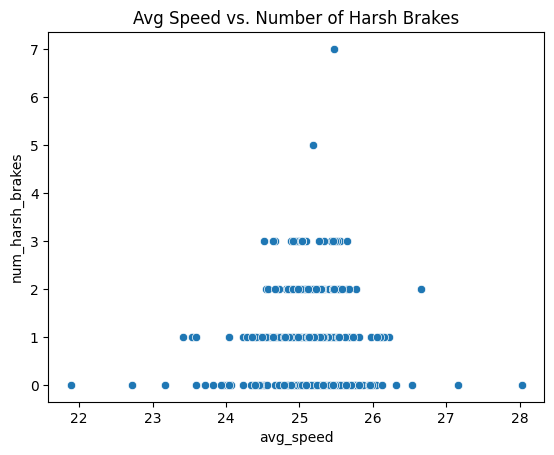

In [ ]:
sns.scatterplot(x='avg_speed', y='num_harsh_brakes', data=features)
plt.title("Avg Speed vs. Number of Harsh Brakes")
plt.show()

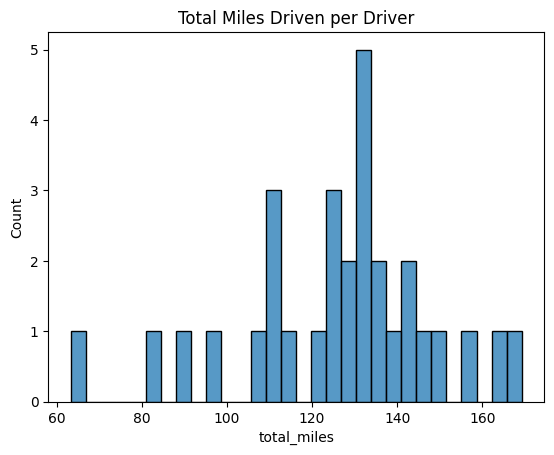

In [ ]:
sns.histplot(drivers['total_miles'], bins=30)
plt.title("Total Miles Driven per Driver")
plt.show()

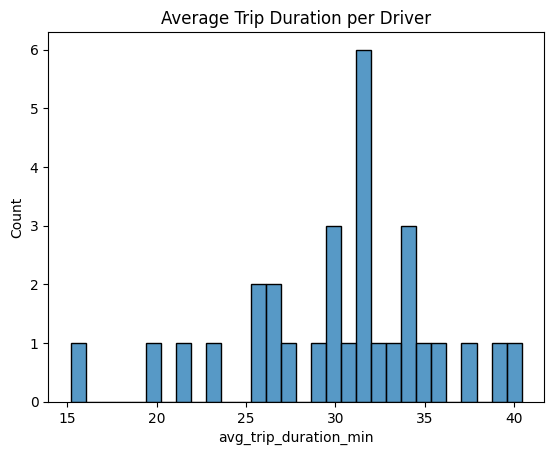

In [ ]:
sns.histplot(drivers['avg_trip_duration_min'], bins=30)
plt.title("Average Trip Duration per Driver")
plt.show()

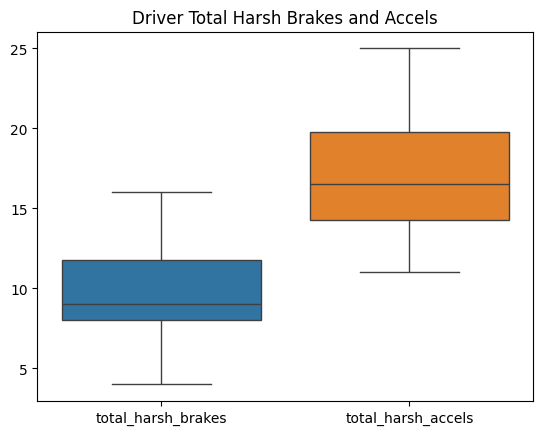

In [ ]:
sns.boxplot(data=drivers[['total_harsh_brakes', 'total_harsh_accels']])
plt.title("Driver Total Harsh Brakes and Accels")
plt.show()